In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 初始条件和步长
x0, y0 = 0, 1
x1 = 1
h_min = 0.0001
h_max = 0.2
tol = 1e-4

In [13]:
# 定义常微分方程
def f(x, y):
    return -y + x**2 + 2

def runge_kutta_4(f, x0, x1, y0, tol, hmax, hmin):
    y1=[]
    x=[]
    t = x0
    y = y0
    y1.append(y0)
    x.append(x0)
    h = hmax
    while t < x1:
        k1=h*f(t,y)
        k2=h*f(t+0.25*h,y+0.25*k1)
        k3=h*f(t+(3/8)*h,y+(3/32)*k1+(9/32)*k2)
        k4=h*f(t+(12/13)*h,y+(1932/2197)*k1-(7200/2197)*k2+(7296/2197)*k3)
        k5=h*f(t+h,y+(439/216)*k1-8*k2+(3680/513)*k3-(845/4104)*k4)
        k6=h*f(t+(1/2)*h,y-(8/27)*k1+2*k2-(3544/2565)*k3+(1859/4104)*k4-(11/40)*k5)
        R=np.abs((1/360)*k1-(128/4275)*k3-(2197/75240)*k4+(1/50)*k5+(2/55)*k6)
        delta=0.84*((tol/R)**(1/4))
        if R<=tol:
            t=t+h
            y=y+(25/216)*k1+(1408/2565)*k3+(2197/4104)*k4-(1/5)*k5
            x.append(t)
            y1.append(y)
        if delta<=0.1:
            h=0.1*h
        else:
            if delta>=4:
                h=4*h
            else:
                h=delta*h
        if h>hmax:
            h=hmax
        if h<hmin:
            print('stop')
            break
    return x, y1

In [14]:
x_rk4, y_rk4 = runge_kutta_4(f, x0, x1, y0, tol, h_max, h_min)

In [25]:
for i in range(len(y_rk4)):
    print(y_rk4[i])
    # print(sol.sol(x_rk4)[0][i])
    # print(x_rk4[i])

1
1.1838083076923076
1.3490406228872582
1.5135657904689523
1.6920135743911044
1.896361805046761


In [17]:
from scipy.integrate import solve_ivp
x_span=(0, 1)
y_0=np.array([1])
sol=solve_ivp(f, x_span, y_0, method='RK45', dense_output=True)
x_values = np.linspace(x_span[0], x_span[1], 1000)
y_values = sol.sol(x_values)
print("Solution: ", sol.sol(x_rk4)[0])
print("Runge-Kutta 4 Method:", y_rk4)

Solution:  [1.         1.18389535 1.3493627  1.51379129 1.69195461 1.89618438]
Runge-Kutta 4 Method: [1, 1.1838083076923076, 1.3490406228872582, 1.5135657904689523, 1.6920135743911044, 1.896361805046761]


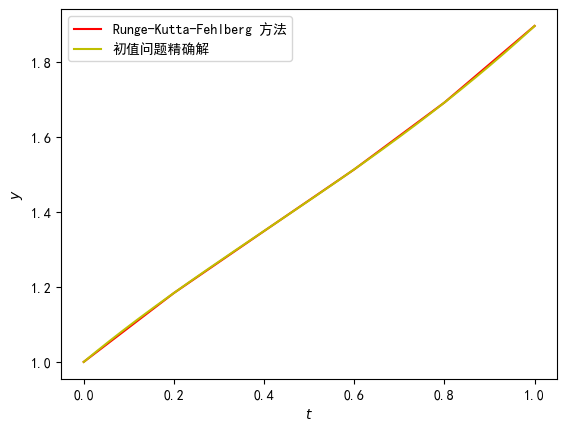

In [21]:
plt.plot(x_rk4, y_rk4, label='Runge-Kutta-Fehlberg 方法', color='r')
plt.plot(x_values, y_values[0], label='初值问题精确解', color='y')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.show()